In [1]:
# All packages used throughout this notebook

# General
import warnings                                                             
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
 
# Statmosdels
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import *
from statsmodels.stats.diagnostic import het_breuschpagan

# Scikit-Learn
from sklearn.datasets import load_diabetes
from scipy.stats import jarque_bera

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading in Relevant Data
#------------------------------------------------------------------------
diabetes = load_diabetes(scaled = True)     
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target

def MaleOrFemale(x):
    if x < 0: return 0
    return 1

df['sex'] = df['sex'].apply(lambda x: MaleOrFemale(x))
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,1,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,1,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,1,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,1,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,0,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


<hr>
<p style="text-align:center; font-size:x-large; color:black;">Diagnostic Tests & Plots</p>
<hr>

When it comes to linear models, there are 4 assumptions that must be held to make our predictions/inferences actually viable... <br>

1.) __True Linear Relationship__ The relationship between the independent variables (predictors) and the dependent variable (response) should be linear. This means that the change in the response variable is proportional to changes in the predictors, and the relationship can be adequately described by a straight line. <br>

2.) __Normality of Residuals__ The errors in the model should follow a normal distribution. While the normality assumption is not necessary for unbiased parameter estimation, it is crucial for valid hypothesis testing and constructing confidence intervals. Departures from normality can affect the accuracy of statistical tests and confidence intervals. Diagnostic plots like Q-Q plots or histograms of residuals can be used to assess the normality assumption. <br>

3.) __Homoscedacity of Residuals__  The variability of the errors should be constant across all levels of the predictors. In practical terms, this means that the spread of the residuals should not systematically increase or decrease as the predicted values change. Heteroscedasticity (unequal variance) can lead to inefficient estimates and biased standard errors. Diagnostic plots such as scale-location plots or residual plots can help identify violations of homoscedasticity. <br>

4.) __Independence of Residuals__ The errors (residuals) in the model should be independent of each other. In other words, the value of one residual should not predict the value of another residual. Violations of this assumption can lead to biased parameter estimates and incorrect inferences. Independence of errors can be assessed by examining residual plots or by conducting tests for autocorrelation if the data are time-series. <br>

In the context of Linear Regressions, __Diagnostics__ are ways we can assess if the 4 assumptions of Linear Regressions hold for a given model. These can either be __visualizations/plots__ or __statistical tests__. Below, I will outline both plots and tests that check if the assumptions of Linear Regression hold for a given Lienar Model. The model I'll use is in the code below... 

In [57]:
model = sm.OLS(df['target'], sm.add_constant(df[['sex', 'bmi', 'bp', 's1', 's3', 's5']])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     76.44
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           6.31e-65
Time:                        00:50:13   Log-Likelihood:                -2388.1
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     435   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.2444      3.730     43.496      0.0

In [23]:
x = [(i) for i in range(1000)]
y = [(i + 1 + np.random.normal(loc = 0, scale = 1, size = 1)) for i in range(1000)]
y2 = [np.square((i/50) + np.random.normal(loc = 0, scale = 1, size = 1)) for i in range(1000)]

linear_relationship = sm.OLS(y, sm.add_constant(x)).fit()
quadratic_relationship = sm.OLS(y2, sm.add_constant(x)).fit()

print(linear_relationship.summary())
print(quadratic_relationship.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.074e+07
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:21:12   Log-Likelihood:                -1433.7
No. Observations:                1000   AIC:                             2871.
Df Residuals:                     998   BIC:                             2881.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9565      0.064     14.897      0.0

<p style="text-align:left; font-size:x-large; color:black;"> Assessing Linearity </p>

One of the main purposes of the residuals vs fitted plot is to check for linearity in the relationship between the dependent variable and the independent variables. If the relationship is truly linear, the residuals (the differences between observed and predicted values) should be randomly scattered around zero across the range of fitted values. A systematic pattern in the residuals suggests a violation of the linearity assumption.

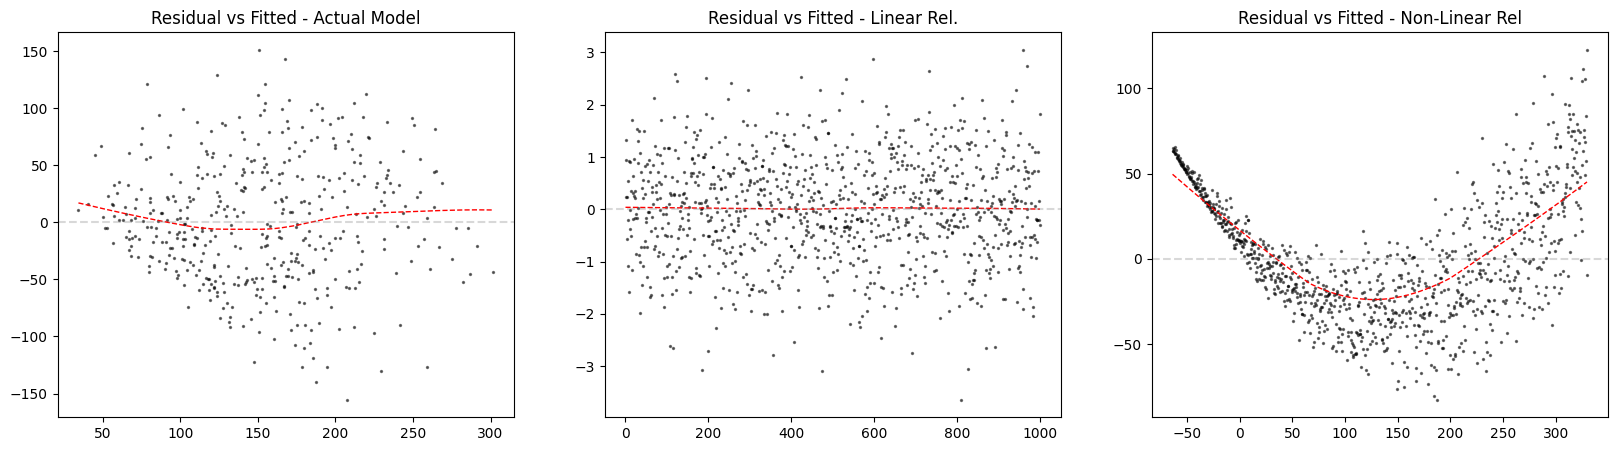

In [65]:
predictions = [model.predict(sm.add_constant(df[['sex', 'bmi', 'bp', 's1', 's3', 's5']])),
                linear_relationship.predict(sm.add_constant(x)),
                quadratic_relationship.predict(sm.add_constant(x))]
residuals = [model.resid, linear_relationship.resid, quadratic_relationship.resid]

fig, axs = plt.subplots(1, 3, figsize=(20, 5)) 

for i in range(len(residuals)):

    sns.regplot(x = predictions[i], y = residuals[i], lowess = True,
                scatter_kws = {'color': 'black', 'alpha': 0.5, 's':2},
                line_kws={'color': 'red', 'lw': 1, 'linestyle':'--'} , ax = axs[i])
    axs[i].axhline(y = 0, color = 'gray', linestyle = '--', alpha = 0.3)

axs[0].set_title('Residual vs Fitted - Actual Model')
axs[1].set_title('Residual vs Fitted - Linear Rel.')
axs[2].set_title('Residual vs Fitted - Non-Linear Rel')

plt.show()


<p style="text-align:left; font-size:x-large; color:black;"> Assessing Normality of Residuals </p>

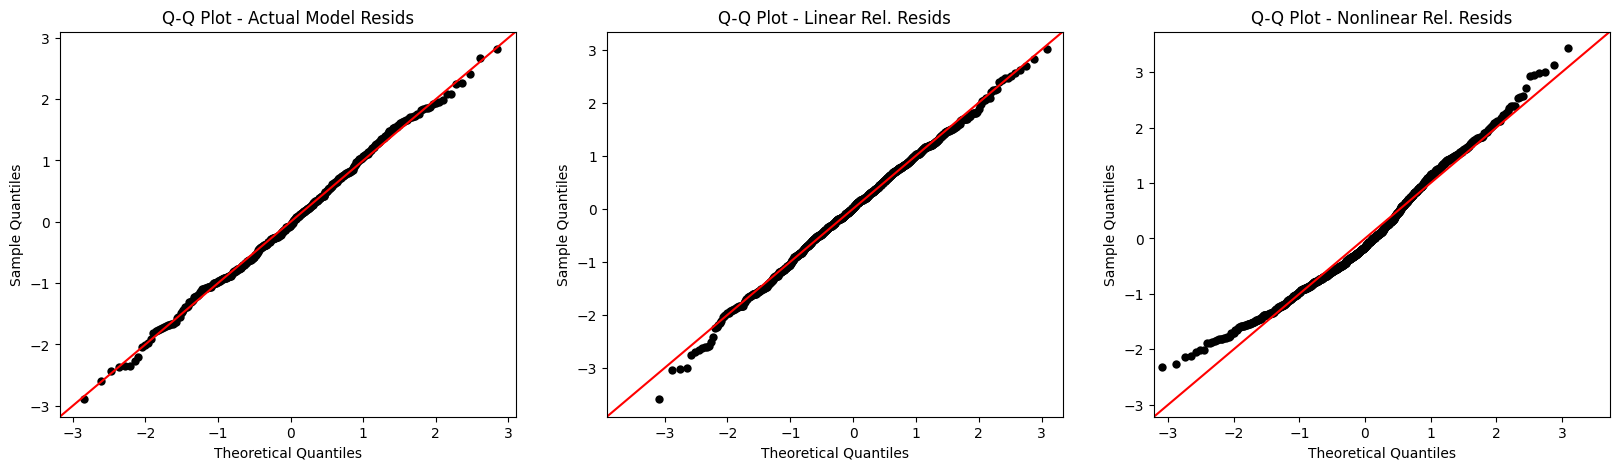

In [67]:

fig, axs = plt.subplots(1, 3, figsize=(20, 5)) 

for i in range(len(residuals)):
    mean_resid = np.mean(residuals[i])
    std_resid = np.std(residuals[i])
    standardized_residuals = [(x - mean_resid) / std_resid for x in residuals[i]]

    sm.qqplot(np.array(standardized_residuals), line = '45',  markerfacecolor = 'black', markeredgecolor  = 'None', ax = axs[i])
    axs[i].set_title('Q-Q Plot of Actual Model Resids')

axs[0].set_title('Q-Q Plot - Actual Model Resids')
axs[1].set_title('Q-Q Plot - Linear Rel. Resids')
axs[2].set_title('Q-Q Plot - Nonlinear Rel. Resids')

plt.show()

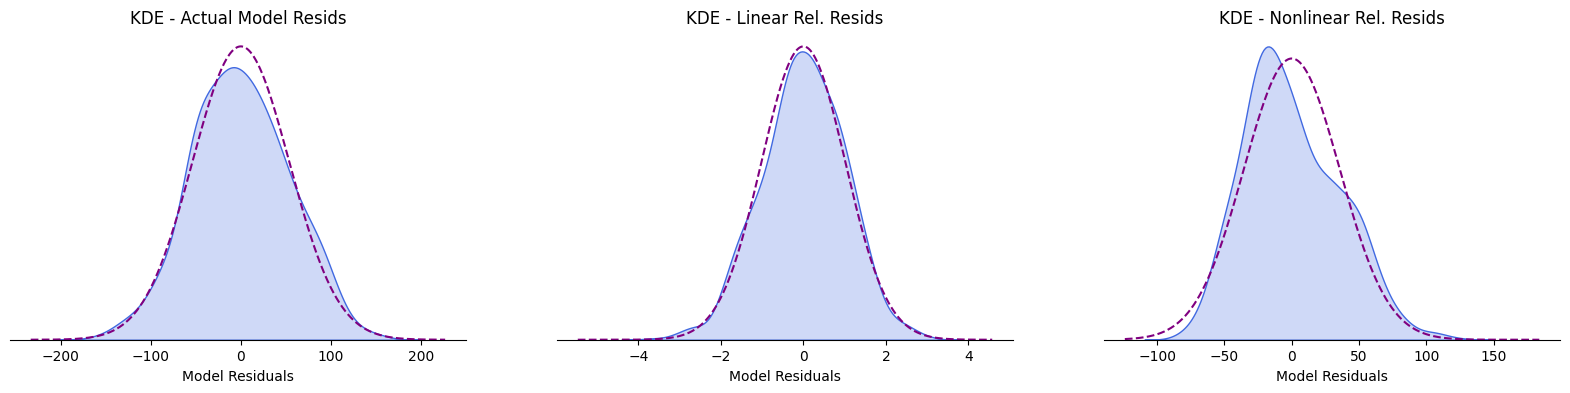

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4)) 

residuals = [model.resid, linear_relationship.resid, quadratic_relationship.resid]

for i in range(len(residuals)):

    normal_x = np.linspace(np.min(residuals[i]) * 1.5, np.max(residuals[i]) * 1.5, 1000)
    normal_pdf = 1 / (np.std(residuals[i]) * np.sqrt(2 * np.pi)) * np.exp(-0.5 * normal_x**2 / np.var(residuals[i]))
    axs[i].plot(normal_x, normal_pdf, color='purple', linestyle = '--', label='True Normal Distribution')

    sns.kdeplot(residuals[i], color = '#4169E1', fill = True, ax = axs[i])
    axs[i].spines[['top', 'right', 'left']].set_visible(False)
    axs[i].set_xlabel('Model Residuals')
    axs[i].set_yticks([])
    axs[i].set_ylabel("")

axs[0].set_title('KDE - Actual Model Resids')
axs[1].set_title('KDE - Linear Rel. Resids')
axs[2].set_title('KDE - Nonlinear Rel. Resids')

plt.show()

In [63]:
for i in range(len(residuals)):
    statistic, p_value = jarque_bera(residuals[i])
    print(p_value)

0.5351393918621884
0.14989549873724886
5.515490380521608e-08


<p style="text-align:left; font-size:x-large; color:black;"> Assessing Homoscedacity of Residuals </p>

The main purpose of the scale-location plot is to check for homoscedasticity, which means that the spread of the residuals should be approximately constant across the range of fitted values. In other words, the variability of the residuals should not systematically change as the predicted values change. If the spread of the residuals appears to vary systematically with the fitted values, it suggests heteroscedasticity, which violates the assumption of homoscedasticity.

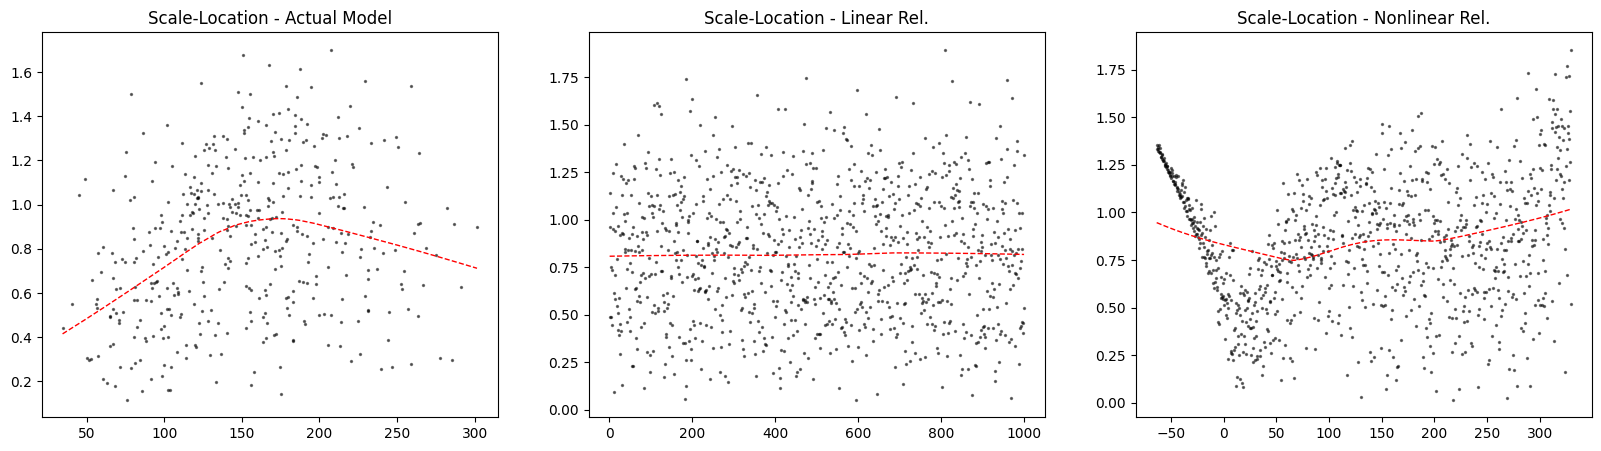

In [71]:

fig, axs = plt.subplots(1, 3, figsize=(20, 5)) 

for i in range(len(residuals)):

    mean_resid = np.mean(residuals[i])
    std_resid = np.std(residuals[i])
    standardized_residuals = [(x - mean_resid) / std_resid for x in residuals[i]]
    sns.regplot(x = predictions[i], y = np.sqrt(np.abs(standardized_residuals)), lowess = True,
                scatter_kws = {'color': 'black', 'alpha': 0.5, 's':2},
                line_kws={'color': 'red', 'lw': 1, 'linestyle':'--'}, ax = axs[i])

axs[0].set_title('Scale-Location - Actual Model')
axs[1].set_title('Scale-Location - Linear Rel.')
axs[2].set_title('Scale-Location - Nonlinear Rel.')
plt.show()


In [73]:
prediction_formulas = [sm.add_constant(df[['sex', 'bmi', 'bp', 's1', 's3', 's5']]),
                       sm.add_constant(x),
                       sm.add_constant(x)]

for i in range(len(residuals)):
    bp_test = het_breuschpagan(residuals[i], prediction_formulas[i])
    bp_test_statistic = bp_test[0]
    bp_p_value = bp_test[1]

    print("Breusch-Pagan test statistic:", bp_test_statistic)
    print("Breusch-Pagan p-value:", bp_p_value)
    print()

Breusch-Pagan test statistic: 20.695321793757902
Breusch-Pagan p-value: 0.0020807039855859208

Breusch-Pagan test statistic: 0.9548979078790598
Breusch-Pagan p-value: 0.32847570262946485

Breusch-Pagan test statistic: 39.21604566798187
Breusch-Pagan p-value: 3.794093438086774e-10



<p style="text-align:left; font-size:x-large; color:black;"> Assessing Independence of Residuals </p>

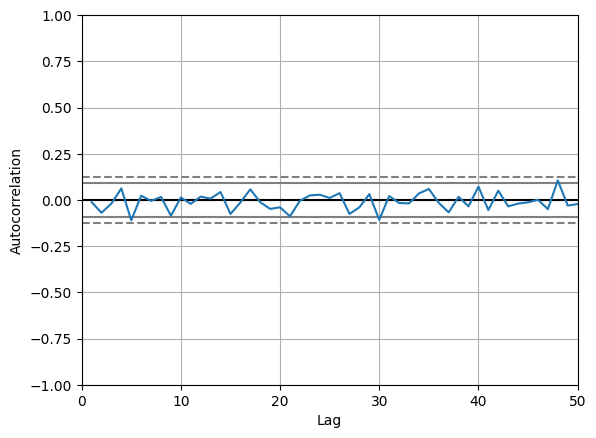

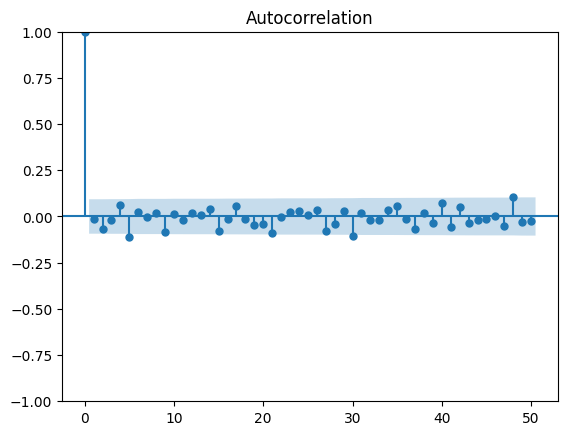

Empty DataFrame
Columns: [lb_stat, lb_pvalue]
Index: []


In [28]:
ax = pd.plotting.autocorrelation_plot(model.resid)
ax.set_xlim([0,50])
plt.show()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(model.resid, lags = 50)
plt.show()

from statsmodels.stats.diagnostic import acorr_ljungbox
test_results = acorr_ljungbox(model.resid, lags = 400)
print(test_results[test_results['lb_pvalue'] <= 0.05])

## Also have durbin watson.


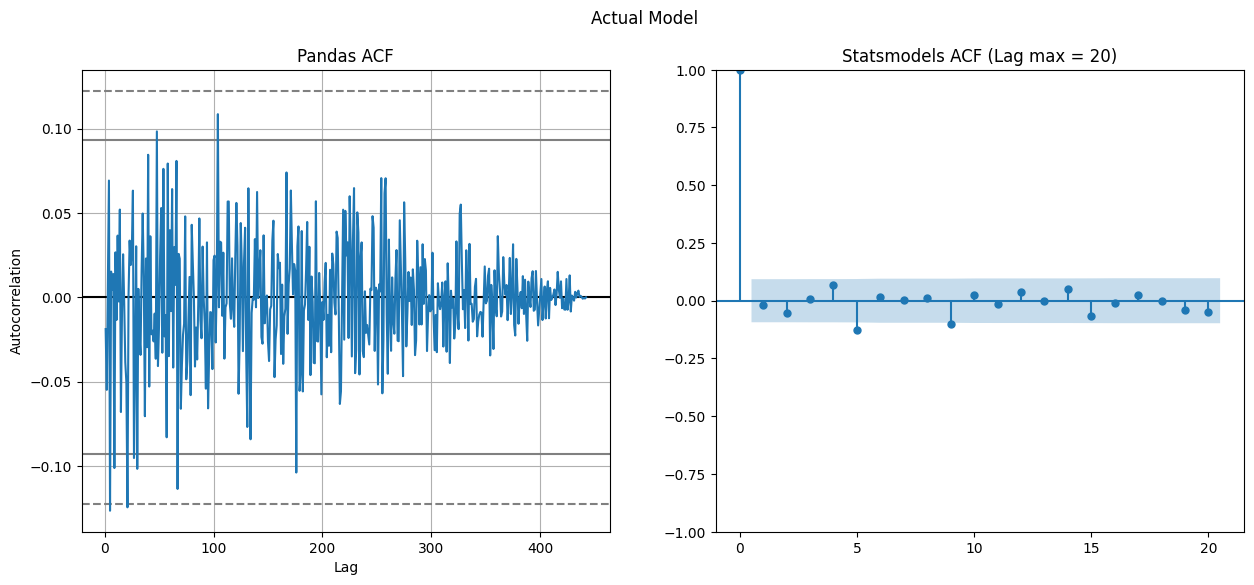

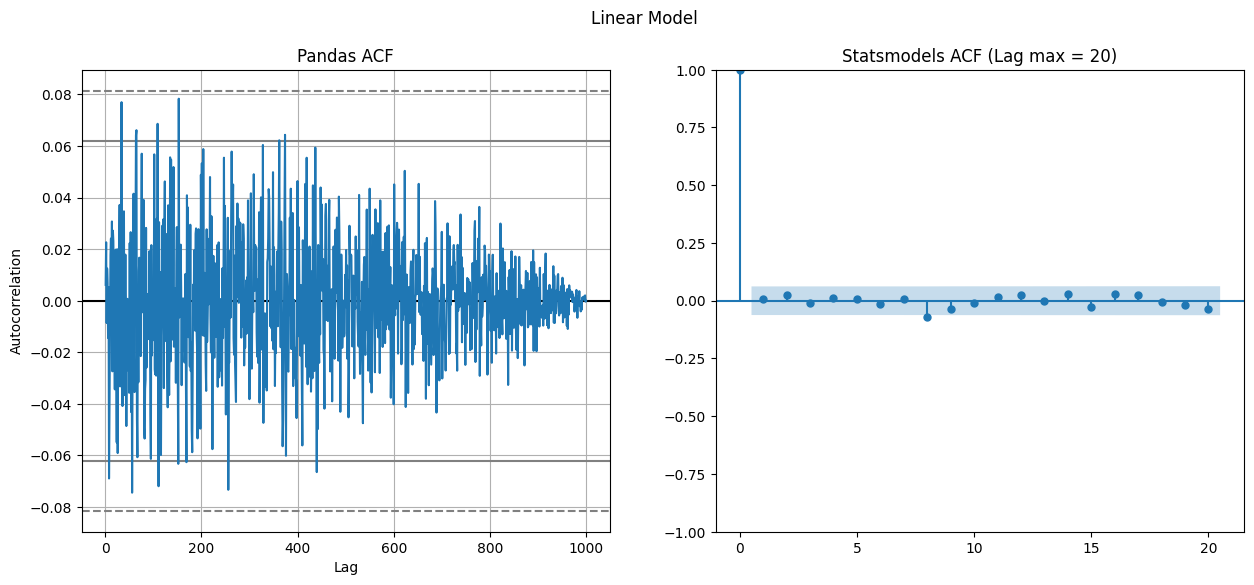

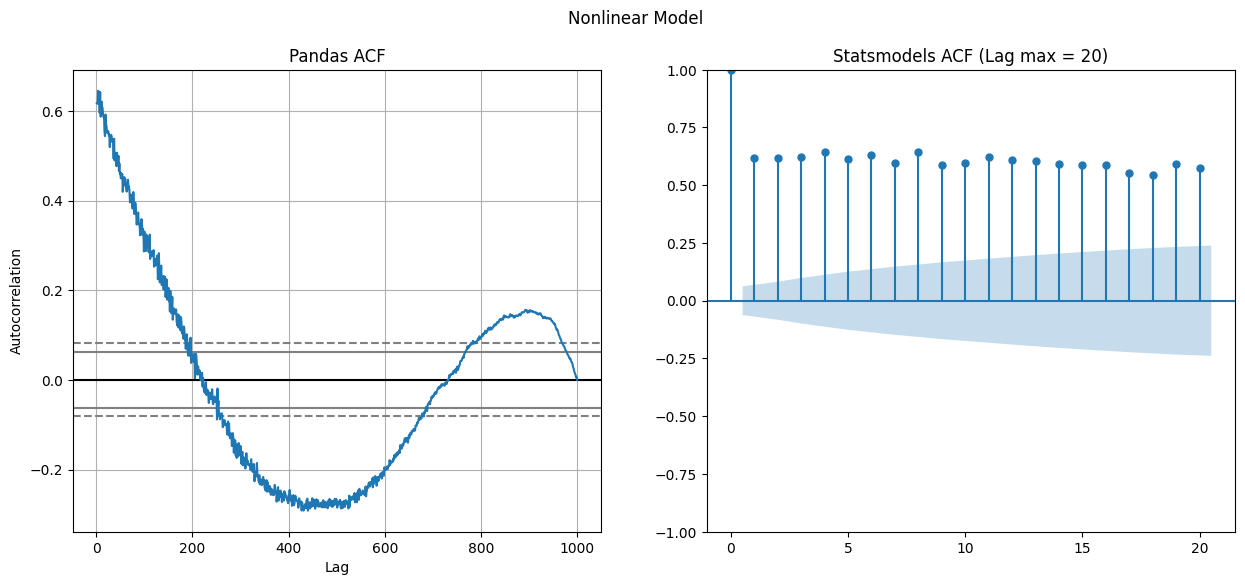

In [84]:
from statsmodels.graphics.tsaplots import plot_acf
for i in range(len(residuals)):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6)) 
    pd.plotting.autocorrelation_plot(residuals[i], ax = axs[0])
    # axs[0].set_xlim([0,50])

    plot_acf(residuals[i], lags = 20, ax = axs[1])

    axs[0].set_title('Pandas ACF')
    axs[1].set_title('Statsmodels ACF (Lag max = 20)')
    plt.suptitle(np.where(i == 0, 'Actual Model', np.where(i == 1, 'Linear Model', 'Nonlinear Model')))
    plt.show()

In [87]:
from statsmodels.stats.diagnostic import acorr_ljungbox

for i in range(len(residuals)):
    test_results = acorr_ljungbox(residuals[i], lags = 400)
    print(i)
    print(test_results[test_results['lb_pvalue'] <= 0.05])
    print()

0
      lb_stat  lb_pvalue
67  88.304715   0.041695
68  88.652132   0.047084
70  91.234453   0.045052
71  92.077669   0.047097

1
Empty DataFrame
Columns: [lb_stat, lb_pvalue]
Index: []

2
          lb_stat      lb_pvalue
1      381.891837   4.820380e-85
2      762.705976  2.401606e-166
3     1149.923843  5.368611e-249
4     1568.253482   0.000000e+00
5     1949.740366   0.000000e+00
..            ...            ...
396  37665.007462   0.000000e+00
397  37784.690109   0.000000e+00
398  37907.133382   0.000000e+00
399  38033.200390   0.000000e+00
400  38143.790330   0.000000e+00

[400 rows x 2 columns]

